In [ ]:
"""
%pip install matplotlib==3.10.1
%pip install pandas==2.2.2
%pip install numpy==1.26.4
"""

'\n%pip install matplotlib==3.10.1\n%pip install pandas==2.2.2\n%pip install numpy==1.26.4\n'

In [ ]:
hf_energy  = -1.1167
fci_energy = -1.13726
exact_energy = -1.17447

In [ ]:
from matplotlib.ticker import MultipleLocator, LogLocator, LogFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import json

In [ ]:
adam_df = pd.read_csv("ADAM_NOISE_FREE.csv")
bobyqa_df = pd.read_csv("BOBYQA_NOISE_FREE.csv")
cobyla_df = pd.read_csv("COBYLA_NOISE_FREE.csv")
imfil_df = pd.read_csv("IMFIL_NOISE_FREE.csv")
pso_df = pd.read_csv("PSO_GBEST_FREE_NOISE.csv")

In [ ]:
pso_df['energies_json'] = pso_df['swarm_global_best_json']

In [ ]:
optimizers = [adam_df, bobyqa_df, cobyla_df, imfil_df, pso_df]

In [ ]:
"""
for optimizer in optimizers:
  optimizer['abs_error'] = (optimizer['energies_json'] - exact_energy).abs()
"""

"\nfor optimizer in optimizers:\n  optimizer['abs_error'] = (optimizer['energies_json'] - exact_energy).abs()\n"

In [ ]:
energies_adam = adam_df['energies_json'].to_list()
energies_bobyqa = bobyqa_df['energies_json'].to_list()
energies_cobyla = cobyla_df['energies_json'].to_list()
energies_imfil = imfil_df['energies_json'].to_list()
energies_pso = pso_df['energies_json'].to_list()

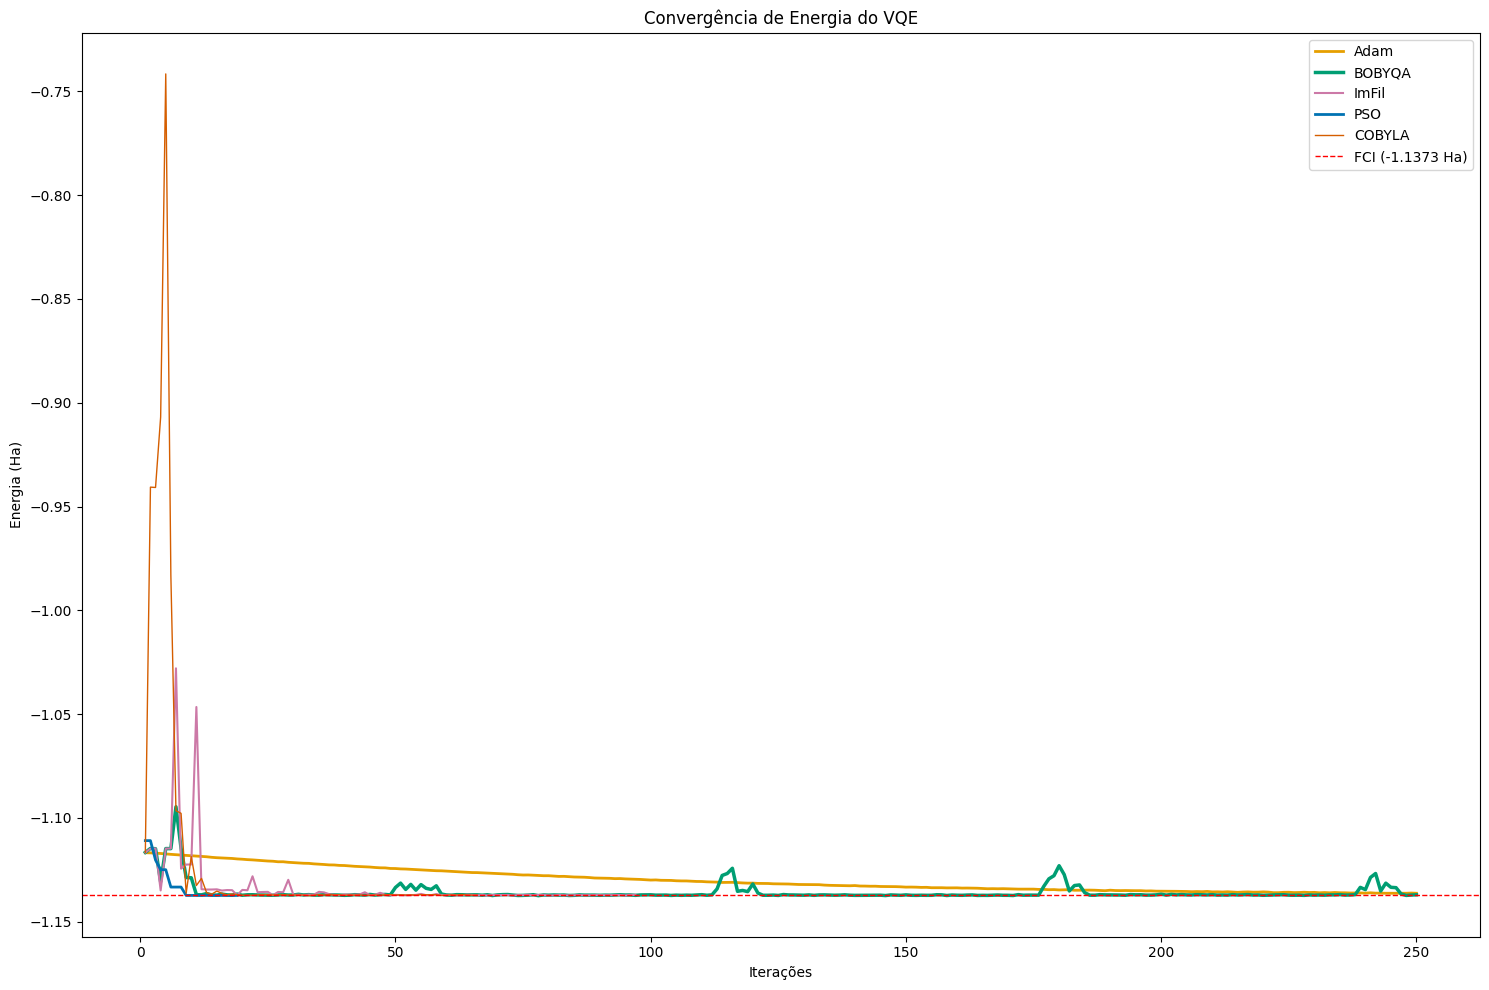

In [ ]:
abs_fci_error = abs(exact_energy - fci_energy)
abs_hf_error = abs(exact_energy - hf_energy)

fig, ax = plt.subplots(figsize=(15, 10))

steps_adam   = list(range(1, len(energies_adam)+1))
steps_bobyqa  = list(range(1, len(energies_bobyqa)+1))
steps_cobyla = list(range(1, len(energies_cobyla)+1))
steps_imfil = list(range(1, len(energies_imfil)+1))
steps_pso = list(range(1, len(energies_pso)+1))


ax.plot(steps_adam, energies_adam, label='Adam',
        color='#E69F00', linewidth=2)

ax.plot(steps_bobyqa, energies_bobyqa, label='BOBYQA',
        color='#009E73', linewidth=2.5)

ax.plot(steps_imfil, energies_imfil, label='ImFil',
        color='#CC79A7', linewidth=1.5)

ax.plot(steps_pso, energies_pso, label='PSO',
        color='#0072B2', linewidth=2)

ax.plot(steps_cobyla, energies_cobyla, label='COBYLA',
        color='#D55E00', linewidth=1)

# Linhas horizontais de referência
ax.axhline(fci_energy, color='red', linestyle='--', linewidth=1,
           label=f'FCI ({fci_energy:.4f} Ha)')

# labels e limites
ax.set_xlabel('Iterações')
ax.set_ylabel('Energia (Ha)')
ax.set_title('Convergência de Energia do VQE')
"""
ax.set_yscale("log")
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.tick_params(axis='both', labelsize=11)
"""
# legenda
ax.legend(loc='upper right', frameon=True, facecolor='white')

ax.grid(False)
plt.tight_layout()
plt.show()
